In [94]:
### import libraries

import numpy as np
import math
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [95]:
### defininf the function and its partial derivative

def f(x,y):
    '''function to minimize'''
    return x**2 + y**2

def df_dx(x):
    '''partial derivative wrt to w1(weight1)/x'''
    return 2 * x

def df_dy(y):
    '''partial derivative wrt to w2(weight1)/x'''
    return 2 * y

In [96]:
### gradient descent logic

def gradient_descent(x_init, y_init, learning_rate, epochs):
    x = x_init
    y = y_init
    buffer = []

    for i in range(epochs):
        # calc gradient
        gradient_x = df_dx(x)
        gradient_y = df_dy(y)
        # update parameters
        x -= learning_rate*gradient_x
        y -= learning_rate*gradient_y

        buffer.append((x, y, f(x,y)))

        if gradient_x == 1e-10 or gradient_y == 1e-10:
            print("Gradient Descent has converged\n")
            print("Gloabal Minima at: x = %d, y = %d\n"%(x,y))
            return x, y, f(x,y), buffer
        
    
    return x, y, f(x,y), buffer

results = gradient_descent(10, 10, 0.1, 200)
results

(4.149515568880998e-19,
 4.149515568880998e-19,
 3.443695891277159e-37,
 [(8.0, 8.0, 128.0),
  (6.4, 6.4, 81.92000000000002),
  (5.12, 5.12, 52.4288),
  (4.096, 4.096, 33.554432),
  (3.2768, 3.2768, 21.47483648),
  (2.62144, 2.62144, 13.743895347200002),
  (2.0971520000000003, 2.0971520000000003, 8.796093022208003),
  (1.6777216000000004, 1.6777216000000004, 5.629499534213123),
  (1.3421772800000003, 1.3421772800000003, 3.602879701896398),
  (1.0737418240000003, 1.0737418240000003, 2.305843009213695),
  (0.8589934592000003, 0.8589934592000003, 1.475739525896765),
  (0.6871947673600002, 0.6871947673600002, 0.9444732965739295),
  (0.5497558138880001, 0.5497558138880001, 0.6044629098073148),
  (0.43980465111040007, 0.43980465111040007, 0.38685626227668146),
  (0.35184372088832006, 0.35184372088832006, 0.24758800785707613),
  (0.281474976710656, 0.281474976710656, 0.1584563250285287),
  (0.22517998136852482, 0.22517998136852482, 0.10141204801825837),
  (0.18014398509481985, 0.1801439850948

In [107]:
x_range = np.arange(-8, 8, 0.1)
y_range = np.arange(-8, 8, 0.1)

X, Y = np.meshgrid(x_range, y_range)
func = f(X, Y)
func[:10]

array([[128.  , 126.41, 124.84, ..., 123.29, 124.84, 126.41],
       [126.41, 124.82, 123.25, ..., 121.7 , 123.25, 124.82],
       [124.84, 123.25, 121.68, ..., 120.13, 121.68, 123.25],
       ...,
       [117.29, 115.7 , 114.13, ..., 112.58, 114.13, 115.7 ],
       [115.84, 114.25, 112.68, ..., 111.13, 112.68, 114.25],
       [114.41, 112.82, 111.25, ..., 109.7 , 111.25, 112.82]],
      shape=(10, 160))

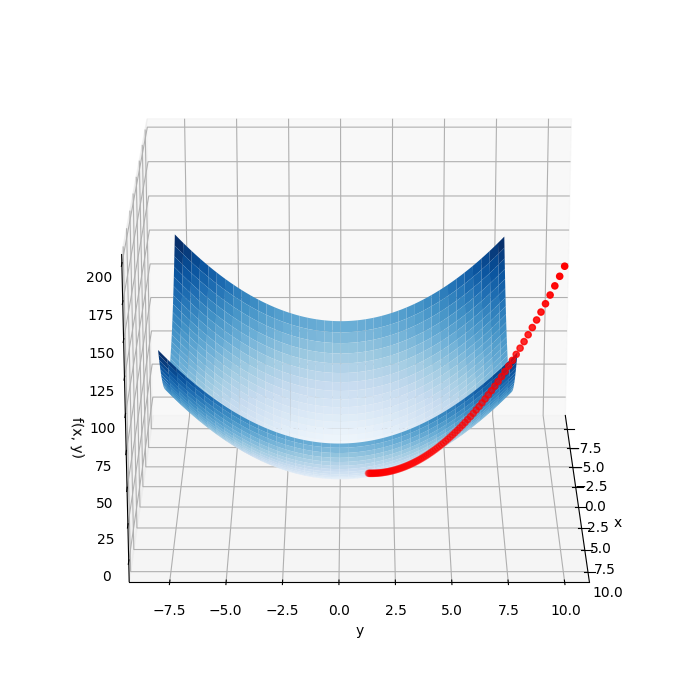

In [117]:
start_x = 10
start_y = 10
alpha = 0.01
x_optimized, y_optimized, func_optimized, buffer = gradient_descent(start_x, start_y, alpha, 100)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')  
ax.plot_surface(X=X, Y=Y, Z=func, cmap='Blues')  
ax.scatter(*zip(*buffer), c='red', marker='o')  
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.view_init(20, 0)
plt.show()